# Основы программирования в Python

*Алла Тамбовцева, НИУ ВШЭ*


## Библиотека pandas. Продолжение.

### Группировка и агрегирование: методы `.groupby()` и `.agg()`

Часто случается, что данные необходимо сгруппировать по какому-то признаку ‒ по значениям определенной переменной. На входе имеется таблица (датафрейм), а на выходе хочется получить несколько таблиц: отдельная таблица для каждого значения. Давайте рассмотрим такой пример. У нас есть база данных с результатами выборов, и нам нужно сгруппировать данные по регионам. 

Для начала импортируем библиотеку pandas и загрузим файл с данными.

In [1]:
import pandas as pd

Для разнообразия загрузим файл по ссылке с Github:

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/allatambov/R-programming-3/master/lectures/lect7-12-01/47130-8314.csv")

В таблице сохранены результаты выборов президента России 2012 года. 

In [3]:
df.head()

,link,uik,kom1,kom2,kom3,kom4,kom5,1,2,3,...,18,19,20,21,22,23,а,б,в,г
0,http://www.adygei.vybory.izbirkom.ru/region/ad...,1,Республика Адыгея (Адыгея),Адыгейская,УИК №1,NaN,NaN,2383.0,2147.0,0.0,...,0.0,24.0,382.0,28.0,71.0,1066.0,NaN,NaN,NaN,NaN
1,http://www.adygei.vybory.izbirkom.ru/region/ad...,2,Республика Адыгея (Адыгея),Адыгейская,УИК №2,NaN,NaN,2865.0,2586.0,0.0,...,0.0,51.0,453.0,49.0,104.0,1174.0,NaN,NaN,NaN,NaN
2,http://www.adygei.vybory.izbirkom.ru/region/ad...,3,Республика Адыгея (Адыгея),Адыгейская,УИК №3,NaN,NaN,2821.0,2558.0,0.0,...,0.0,36.0,481.0,24.0,107.0,1025.0,NaN,NaN,NaN,NaN
3,http://www.adygei.vybory.izbirkom.ru/region/ad...,4,Республика Адыгея (Адыгея),Адыгейская,УИК №4,NaN,NaN,2069.0,1868.0,0.0,...,0.0,0.0,414.0,0.0,48.0,784.0,NaN,NaN,NaN,NaN
4,http://www.adygei.vybory.izbirkom.ru/region/ad...,5,Республика Адыгея (Адыгея),Адыгейская,УИК №5,NaN,NaN,777.0,705.0,0.0,...,0.0,19.0,138.0,4.0,7.0,286.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90003 entries, 0 to 90002
Data columns (total 34 columns):
link    90003 non-null object
uik     90003 non-null int64
kom1    90003 non-null object
kom2    90003 non-null object
kom3    89618 non-null object
kom4    0 non-null float64
kom5    0 non-null float64
1       89994 non-null float64
2       89994 non-null float64
3       89994 non-null float64
4       89994 non-null float64
5       89994 non-null float64
6       89994 non-null float64
7       89994 non-null float64
8       89994 non-null float64
9       89994 non-null float64
10      89994 non-null float64
11      89994 non-null float64
12      89994 non-null float64
13      89994 non-null float64
14      89994 non-null float64
15      89994 non-null float64
16      89994 non-null float64
17      89994 non-null float64
18      89994 non-null float64
19      89994 non-null float64
20      89994 non-null float64
21      89994 non-null float64
22      89994 non-null float64
23    

Таблица достаточно большая, поэтому давайте выберем те столбцы, которые понадобятся нам для работы. Какие именно? Столбцы в этой базе имеют порядковый номер строки в таблице на [сайте]() Центральной избирательной комиссии.

Выберем столбцы, которые соответствуют уровням комиссий, а также следующим показателям: общее число зарегистрированных избирателей, число недействительных бюллетеней, число действительных бюллетеней, число голосов за Жириновского, Зюганова, Миронова, Прохорова и Путина.

In [5]:
d = df[["kom1", "kom2", "kom3", "1", "9", "10", "19", "20", "21", "22", "23"]]

In [7]:
d.head()

,kom1,kom2,kom3,1,9,10,19,20,21,22,23
0,Республика Адыгея (Адыгея),Адыгейская,УИК №1,2383.0,19.0,1571.0,24.0,382.0,28.0,71.0,1066.0
1,Республика Адыгея (Адыгея),Адыгейская,УИК №2,2865.0,29.0,1831.0,51.0,453.0,49.0,104.0,1174.0
2,Республика Адыгея (Адыгея),Адыгейская,УИК №3,2821.0,31.0,1673.0,36.0,481.0,24.0,107.0,1025.0
3,Республика Адыгея (Адыгея),Адыгейская,УИК №4,2069.0,0.0,1246.0,0.0,414.0,0.0,48.0,784.0
4,Республика Адыгея (Адыгея),Адыгейская,УИК №5,777.0,8.0,454.0,19.0,138.0,4.0,7.0,286.0


Теперь присвоим столбцам более информативные названия:

In [9]:
d.columns = ["region", "tik", "uik", "total", "invalid", "valid", "Zh", "Zu", "Mi", "Pr", "Pu"]

In [10]:
d.head() # опять посмотрим

,region,tik,uik,total,invalid,valid,Zh,Zu,Mi,Pr,Pu
0,Республика Адыгея (Адыгея),Адыгейская,УИК №1,2383.0,19.0,1571.0,24.0,382.0,28.0,71.0,1066.0
1,Республика Адыгея (Адыгея),Адыгейская,УИК №2,2865.0,29.0,1831.0,51.0,453.0,49.0,104.0,1174.0
2,Республика Адыгея (Адыгея),Адыгейская,УИК №3,2821.0,31.0,1673.0,36.0,481.0,24.0,107.0,1025.0
3,Республика Адыгея (Адыгея),Адыгейская,УИК №4,2069.0,0.0,1246.0,0.0,414.0,0.0,48.0,784.0
4,Республика Адыгея (Адыгея),Адыгейская,УИК №5,777.0,8.0,454.0,19.0,138.0,4.0,7.0,286.0


Посмотрим теперь, какие регионы есть в базе. Выбрать столбец *region* в таком случае будет не совсем удачно, поскольку в нем будет много повторяющихся значенийй. Посмотрим только на уникальные:

In [14]:
d.region.unique() # метод unique - уникальные значения

array(['Республика Адыгея (Адыгея)', 'Республика Алтай',
       'Республика Башкортостан', 'Республика Бурятия',
       'Республика Дагестан', 'Ðåñïóáëèêà Äàãåñòàí',
       'Республика Ингушетия', 'Кабардино-Балкарская Республика',
       'Республика Калмыкия', 'Карачаево-Черкесская Республика',
       'Республика Карелия', 'Республика Коми', 'Республика Марий Эл',
       'Республика Мордовия', 'Республика Саха (Якутия)',
       'Республика Северная Осетия - Алания', 'Республика Тыва',
       'Удмуртская Республика', 'Республика Хакасия',
       'Чувашская Республика - Чувашия', 'Алтайский край',
       'Забайкальский край', 'Камчатский край', 'Краснодарский край',
       'Красноярский край', 'Пермский край', 'Приморский край',
       'Ставропольский край', 'Хабаровский край', 'Õàáàðîâñêèé êðàé',
       'Амурская область', 'Архангельская область',
       'Астраханская область', 'Белгородская область', 'Брянская область',
       'Владимирская область', 'Волгоградская область',
       'В

Видно, что в этом массиве встречаются какие-то крокозябры (названия со странной кодировкой). Давайте уберем эти строки из базы.

In [16]:
# отфильтруем с помощью условий
d = d[(d.region != 'Ðåñïóáëèêà Äàãåñòàí') & 
  (d.region != 'Õàáàðîâñêèé êðàé') & 
  (d.region != 'Ìóðìàíñêàÿ îáëàñòü') & (d.region != 'Ãîðîä Ñàíêò-Ïåòåðáóðã')]

Сгруппируем данные по регионам и посчитаем для каждого региона явку в процентах и процент голосов за каждого кандидата. Группировка осуществляется с помощью метода `.groupby()`.

In [12]:
d.groupby('region') # пока ничего не увидели

Что выдает метод `.groupby()`? На самом деле он делает следующее: создает список, состоящий из кортежей. Каждый кортеж ‒ это пара *название группы*-*соответствующий ей фрагмент датафрейма*.

In [18]:
# посмотрим на все сразу
for g in d.groupby('region'):
    print(g)

('Алтайский край',                region                 tik        uik   total  invalid   valid  \
14416  Алтайский край            Алейская   УИК №517   577.0      2.0   368.0   
14417  Алтайский край            Алейская   УИК №518   233.0      0.0   165.0   
14418  Алтайский край            Алейская   УИК №519    46.0      0.0    36.0   
14419  Алтайский край            Алейская   УИК №520   135.0      0.0   101.0   
14420  Алтайский край            Алейская   УИК №521   185.0      0.0   146.0   
14421  Алтайский край            Алейская   УИК №522   308.0      7.0   216.0   
14422  Алтайский край            Алейская   УИК №523   550.0      1.0   370.0   
14423  Алтайский край            Алейская   УИК №524   464.0      1.0   306.0   
14424  Алтайский край            Алейская   УИК №525    97.0      1.0    71.0   
14425  Алтайский край            Алейская   УИК №526   923.0      7.0   632.0   
14426  Алтайский край            Алейская   УИК №527    82.0      0.0    56.0   
14427  Ал

('Брянская область',                  region               tik        uik   total  invalid   valid  \
31622  Брянская область        Брасовская   УИК №171  1188.0      5.0   704.0   
31623  Брянская область        Брасовская   УИК №172   231.0      0.0   190.0   
31624  Брянская область        Брасовская   УИК №173   318.0      4.0   255.0   
31625  Брянская область        Брасовская   УИК №174   349.0      3.0   246.0   
31626  Брянская область        Брасовская   УИК №175   530.0      3.0   417.0   
31627  Брянская область        Брасовская   УИК №176   156.0      1.0   123.0   
31628  Брянская область        Брасовская   УИК №177   401.0      7.0   303.0   
31629  Брянская область        Брасовская   УИК №178   296.0      1.0   225.0   
31630  Брянская область        Брасовская   УИК №179   344.0      1.0   275.0   
31631  Брянская область        Брасовская   УИК №180   320.0      2.0   238.0   
31632  Брянская область        Брасовская   УИК №181    54.0      0.0    51.0   
31633  

('Город Санкт-Петербург',                       region                                         tik  \
87213  Город Санкт-Петербург   Территориальная избирательная комиссия №1   
87214  Город Санкт-Петербург   Территориальная избирательная комиссия №1   
87215  Город Санкт-Петербург   Территориальная избирательная комиссия №1   
87216  Город Санкт-Петербург   Территориальная избирательная комиссия №1   
87217  Город Санкт-Петербург   Территориальная избирательная комиссия №1   
87218  Город Санкт-Петербург   Территориальная избирательная комиссия №1   
87219  Город Санкт-Петербург   Территориальная избирательная комиссия №1   
87220  Город Санкт-Петербург   Территориальная избирательная комиссия №1   
87221  Город Санкт-Петербург   Территориальная избирательная комиссия №1   
87222  Город Санкт-Петербург   Территориальная избирательная комиссия №1   
87223  Город Санкт-Петербург   Территориальная избирательная комиссия №1   
87224  Город Санкт-Петербург   Территориальная избирательная к

('Иркутская область',                   region                 tik        uik   total  invalid  \
38776  Иркутская область           Ангарская    УИК №50  1758.0      7.0   
38777  Иркутская область           Ангарская    УИК №51  1746.0     10.0   
38778  Иркутская область           Ангарская    УИК №52  1806.0     19.0   
38779  Иркутская область           Ангарская    УИК №53  2045.0     20.0   
38780  Иркутская область           Ангарская    УИК №54  1474.0     17.0   
38781  Иркутская область           Ангарская    УИК №55  2590.0     21.0   
38782  Иркутская область           Ангарская    УИК №56  1399.0     13.0   
38783  Иркутская область           Ангарская    УИК №57  1536.0     14.0   
38784  Иркутская область           Ангарская    УИК №58  1969.0     17.0   
38785  Иркутская область           Ангарская    УИК №59  2286.0     18.0   
38786  Иркутская область           Ангарская    УИК №60  1971.0     13.0   
38787  Иркутская область           Ангарская    УИК №61  1750.0   

('Камчатский край',                 region              tik       uik   total  invalid   valid  \
17233  Камчатский край        Алеутская  УИК №168   500.0      7.0   378.0   
17234  Камчатский край      Быстринская  УИК №154  1832.0      8.0  1258.0   
17235  Камчатский край      Быстринская  УИК №155   432.0      4.0   267.0   
17236  Камчатский край     Вилючинская    УИК №85  1184.0     55.0   646.0   
17237  Камчатский край     Вилючинская    УИК №86   173.0      2.0   121.0   
17238  Камчатский край     Вилючинская    УИК №87  1026.0     11.0   609.0   
17239  Камчатский край     Вилючинская    УИК №88  1138.0      8.0   710.0   
17240  Камчатский край     Вилючинская    УИК №89  1106.0     10.0   659.0   
17241  Камчатский край     Вилючинская    УИК №90  1114.0      7.0   713.0   
17242  Камчатский край     Вилючинская    УИК №91  1741.0     23.0  1179.0   
17243  Камчатский край     Вилючинская    УИК №92   934.0     14.0   751.0   
17244  Камчатский край     Вилючинская    УИ

('Костромская область',                     region                   tik       uik   total  invalid  \
44353  Костромская область          Антроповская    УИК №1  1922.0      8.0   
44354  Костромская область          Антроповская    УИК №2  1001.0      3.0   
44355  Костромская область          Антроповская    УИК №3   155.0      0.0   
44356  Костромская область          Антроповская    УИК №4   193.0      0.0   
44357  Костромская область          Антроповская    УИК №5   426.0      1.0   
44358  Костромская область          Антроповская    УИК №6   146.0      0.0   
44359  Костромская область          Антроповская    УИК №7   191.0      1.0   
44360  Костромская область          Антроповская    УИК №8   239.0      0.0   
44361  Костромская область          Антроповская    УИК №9   170.0      0.0   
44362  Костромская область          Антроповская   УИК №10   134.0      2.0   
44363  Костромская область          Антроповская   УИК №11   288.0      0.0   
44364  Костромская область  

('Курская область',                 region                     tik        uik   total  invalid  \
46151  Курская область               Беловская   УИК №265  2370.0     15.0   
46152  Курская область               Беловская   УИК №266   305.0      3.0   
46153  Курская область               Беловская   УИК №267   312.0      2.0   
46154  Курская область               Беловская   УИК №268   989.0      8.0   
46155  Курская область               Беловская   УИК №269   110.0      1.0   
46156  Курская область               Беловская   УИК №270   580.0      0.0   
46157  Курская область               Беловская   УИК №271   275.0      1.0   
46158  Курская область               Беловская   УИК №272   696.0      2.0   
46159  Курская область               Беловская   УИК №273  1517.0      5.0   
46160  Курская область               Беловская   УИК №274   405.0      9.0   
46161  Курская область               Беловская   УИК №275   186.0      1.0   
46162  Курская область               Беловск

('Московская область',                    region                         tik        uik   total  \
49271  Московская область               Балашихинская     УИК №1  2441.0   
49272  Московская область               Балашихинская     УИК №2  3111.0   
49273  Московская область               Балашихинская     УИК №3  2372.0   
49274  Московская область               Балашихинская     УИК №4  2528.0   
49275  Московская область               Балашихинская     УИК №5  2388.0   
49276  Московская область               Балашихинская     УИК №6  2575.0   
49277  Московская область               Балашихинская     УИК №7  2463.0   
49278  Московская область               Балашихинская     УИК №8  2588.0   
49279  Московская область               Балашихинская     УИК №9  2689.0   
49280  Московская область               Балашихинская    УИК №10  2615.0   
49281  Московская область               Балашихинская    УИК №11  1728.0   
49282  Московская область               Балашихинская    УИК №12 

('Новосибирская область',                       region             tik        uik   total  invalid  \
56159  Новосибирская область      Баганская      УИК №1   450.0      1.0   
56160  Новосибирская область      Баганская      УИК №2   164.0      1.0   
56161  Новосибирская область      Баганская      УИК №3    83.0      0.0   
56162  Новосибирская область      Баганская      УИК №4    39.0      0.0   
56163  Новосибирская область      Баганская      УИК №5   278.0      4.0   
56164  Новосибирская область      Баганская      УИК №6   465.0      1.0   
56165  Новосибирская область      Баганская      УИК №7   597.0      3.0   
56166  Новосибирская область      Баганская      УИК №8  1560.0      6.0   
56167  Новосибирская область      Баганская      УИК №9   983.0      8.0   
56168  Новосибирская область      Баганская     УИК №10  1104.0      6.0   
56169  Новосибирская область      Баганская     УИК №11   126.0      0.0   
56170  Новосибирская область      Баганская     УИК №12   173.

('Пермский край',               region              tik        uik   total  invalid   valid  \
22443  Пермский край  Александровская   УИК №101   726.0      9.0   338.0   
22444  Пермский край  Александровская   УИК №102   808.0      7.0   363.0   
22445  Пермский край  Александровская   УИК №103   533.0      3.0   197.0   
22446  Пермский край  Александровская   УИК №104   892.0      1.0   434.0   
22447  Пермский край  Александровская   УИК №105  1777.0     15.0   939.0   
22448  Пермский край  Александровская   УИК №106  1772.0     24.0  1003.0   
22449  Пермский край  Александровская   УИК №107  1927.0     11.0  1091.0   
22450  Пермский край  Александровская   УИК №108  1779.0     20.0   950.0   
22451  Пермский край  Александровская   УИК №109  1759.0     21.0   943.0   
22452  Пермский край  Александровская   УИК №110   979.0      6.0   390.0   
22453  Пермский край  Александровская   УИК №111  1799.0     18.0   950.0   
22454  Пермский край  Александровская   УИК №112  1913.0  

('Республика Башкортостан',                        region            tik        uik   total  invalid  \
506   Республика Башкортостан  Абзелиловская   УИК №745   352.0      3.0   
507   Республика Башкортостан  Абзелиловская   УИК №746   441.0      0.0   
508   Республика Башкортостан  Абзелиловская   УИК №747   130.0      0.0   
509   Республика Башкортостан  Абзелиловская   УИК №748   273.0      5.0   
510   Республика Башкортостан  Абзелиловская   УИК №749   220.0      1.0   
511   Республика Башкортостан  Абзелиловская   УИК №750  1079.0     11.0   
512   Республика Башкортостан  Абзелиловская   УИК №751   233.0      5.0   
513   Республика Башкортостан  Абзелиловская   УИК №752   412.0      4.0   
514   Республика Башкортостан  Абзелиловская   УИК №753   376.0      7.0   
515   Республика Башкортостан  Абзелиловская   УИК №754   289.0      1.0   
516   Республика Башкортостан  Абзелиловская   УИК №755   286.0      1.0   
517   Республика Башкортостан  Абзелиловская   УИК №756  142

('Республика Карелия',                   region                                    tik       uik  \
7736  Республика Карелия                            Беломорская  УИК №184   
7737  Республика Карелия                            Беломорская  УИК №185   
7738  Республика Карелия                            Беломорская  УИК №187   
7739  Республика Карелия                            Беломорская  УИК №188   
7740  Республика Карелия                            Беломорская  УИК №189   
7741  Республика Карелия                            Беломорская  УИК №190   
7742  Республика Карелия                            Беломорская  УИК №191   
7743  Республика Карелия                            Беломорская  УИК №192   
7744  Республика Карелия                            Беломорская  УИК №193   
7745  Республика Карелия                            Беломорская  УИК №194   
7746  Республика Карелия                            Беломорская  УИК №195   
7747  Республика Карелия                            Б

('Республика Тыва',                 region               tik       uik   total  invalid   valid  \
11477  Республика Тыва    Ак-Довуракская   УИК №33  1231.0     15.0  1096.0   
11478  Республика Тыва    Ак-Довуракская   УИК №34  1020.0     18.0   996.0   
11479  Республика Тыва    Ак-Довуракская   УИК №35  1000.0     11.0   986.0   
11480  Республика Тыва    Ак-Довуракская   УИК №36  1163.0      7.0  1126.0   
11481  Республика Тыва    Ак-Довуракская   УИК №37  1055.0      4.0   967.0   
11482  Республика Тыва    Ак-Довуракская   УИК №38  1005.0     10.0   995.0   
11483  Республика Тыва    Бай-Тайгинская   УИК №39  1799.0     22.0  1753.0   
11484  Республика Тыва    Бай-Тайгинская   УИК №40   409.0      0.0   405.0   
11485  Республика Тыва    Бай-Тайгинская   УИК №41   441.0      2.0   439.0   
11486  Республика Тыва    Бай-Тайгинская   УИК №42   513.0      3.0   490.0   
11487  Республика Тыва    Бай-Тайгинская   УИК №43   725.0      0.0   725.0   
11488  Республика Тыва    Бай-Та

('Самарская область',                   region           tik        uik   total  invalid   valid  \
68053  Самарская область  Алексеевская  УИК №1085  1154.0     13.0   687.0   
68054  Самарская область  Алексеевская  УИК №1086   975.0     10.0   596.0   
68055  Самарская область  Алексеевская  УИК №1087   828.0      9.0   540.0   
68056  Самарская область  Алексеевская  УИК №1088   962.0      6.0   613.0   
68057  Самарская область  Алексеевская  УИК №1089   243.0      2.0   139.0   
68058  Самарская область  Алексеевская  УИК №1090   322.0      1.0   196.0   
68059  Самарская область  Алексеевская  УИК №1091   221.0      0.0   105.0   
68060  Самарская область  Алексеевская  УИК №1092   158.0      1.0   101.0   
68061  Самарская область  Алексеевская  УИК №1093   170.0      0.0   156.0   
68062  Самарская область  Алексеевская  УИК №1094   681.0      3.0   440.0   
68063  Самарская область  Алексеевская  УИК №1095   255.0      2.0   156.0   
68064  Самарская область  Алексеевская  УИ

('Свердловская область',                      region                   tik        uik   total  invalid  \
71991  Свердловская область           Алапаевская     УИК №1   958.0      9.0   
71992  Свердловская область           Алапаевская     УИК №2   291.0      0.0   
71993  Свердловская область           Алапаевская     УИК №3    83.0      0.0   
71994  Свердловская область           Алапаевская     УИК №4   100.0      1.0   
71995  Свердловская область           Алапаевская     УИК №5  1467.0      6.0   
71996  Свердловская область           Алапаевская     УИК №6  1356.0      9.0   
71997  Свердловская область           Алапаевская     УИК №7  1445.0     12.0   
71998  Свердловская область           Алапаевская     УИК №8  1514.0     12.0   
71999  Свердловская область           Алапаевская     УИК №9   966.0      8.0   
72000  Свердловская область           Алапаевская    УИК №10  1802.0     16.0   
72001  Свердловская область           Алапаевская    УИК №11   532.0      1.0   
720

('Тверская область',                  region             tik        uik   total  invalid   valid  \
76290  Тверская область  Андреапольская     УИК №1   629.0      2.0   343.0   
76291  Тверская область  Андреапольская     УИК №2   711.0      1.0   448.0   
76292  Тверская область  Андреапольская     УИК №3   335.0      0.0   198.0   
76293  Тверская область  Андреапольская     УИК №4   361.0      2.0   260.0   
76294  Тверская область  Андреапольская     УИК №5   610.0      4.0   377.0   
76295  Тверская область  Андреапольская     УИК №6   610.0      1.0   331.0   
76296  Тверская область  Андреапольская     УИК №7   741.0      2.0   380.0   
76297  Тверская область  Андреапольская     УИК №8   691.0      6.0   368.0   
76298  Тверская область  Андреапольская     УИК №9   650.0      4.0   377.0   
76299  Тверская область  Андреапольская    УИК №10   816.0      6.0   479.0   
76300  Тверская область  Андреапольская    УИК №11   677.0      6.0   403.0   
76301  Тверская область  Андреа

('Тульская область',                  region          tik       uik   total  invalid   valid  \
78326  Тульская область  Алексинская    УИК №1  1384.0     10.0  1082.0   
78327  Тульская область  Алексинская    УИК №2  1249.0      3.0  1049.0   
78328  Тульская область  Алексинская    УИК №3  1412.0     10.0  1105.0   
78329  Тульская область  Алексинская    УИК №4   991.0      3.0   877.0   
78330  Тульская область  Алексинская    УИК №5  1667.0     20.0  1334.0   
78331  Тульская область  Алексинская    УИК №6  1443.0     12.0   924.0   
78332  Тульская область  Алексинская    УИК №7  1542.0     11.0   991.0   
78333  Тульская область  Алексинская    УИК №8  1369.0     11.0  1060.0   
78334  Тульская область  Алексинская    УИК №9  1089.0      6.0   827.0   
78335  Тульская область  Алексинская   УИК №10  1454.0      4.0  1141.0   
78336  Тульская область  Алексинская   УИК №11  1374.0      9.0  1207.0   
78337  Тульская область  Алексинская   УИК №12  1150.0      4.0   975.0   
7833

('Ульяновская область',                     region                tik       uik   total  invalid  \
80589  Ульяновская область  Базарносызганская    УИК №1  1174.0     10.0   
80590  Ульяновская область  Базарносызганская    УИК №2  1244.0      7.0   
80591  Ульяновская область  Базарносызганская    УИК №3  1518.0     12.0   
80592  Ульяновская область  Базарносызганская    УИК №4   214.0      5.0   
80593  Ульяновская область  Базарносызганская    УИК №5   301.0      2.0   
80594  Ульяновская область  Базарносызганская    УИК №6    92.0      1.0   
80595  Ульяновская область  Базарносызганская    УИК №7   276.0      0.0   
80596  Ульяновская область  Базарносызганская    УИК №8    57.0      0.0   
80597  Ульяновская область  Базарносызганская    УИК №9   260.0      2.0   
80598  Ульяновская область  Базарносызганская   УИК №10   352.0      1.0   
80599  Ульяновская область  Базарносызганская   УИК №11    92.0      0.0   
80600  Ульяновская область  Базарносызганская   УИК №12   145.0 

('Чукотский автономный округ',                            region                   tik      uik   total  \
89350  Чукотский автономный округ            Анадырская   УИК №6   635.0   
89351  Чукотский автономный округ            Анадырская   УИК №7  1114.0   
89352  Чукотский автономный округ            Анадырская   УИК №8   782.0   
89353  Чукотский автономный округ            Анадырская   УИК №9   527.0   
89354  Чукотский автономный округ            Анадырская  УИК №10   267.0   
89355  Чукотский автономный округ            Анадырская  УИК №11    86.0   
89356  Чукотский автономный округ            Анадырская  УИК №12   110.0   
89357  Чукотский автономный округ            Анадырская  УИК №13   478.0   
89358  Чукотский автономный округ            Анадырская  УИК №14   147.0   
89359  Чукотский автономный округ            Анадырская  УИК №15   428.0   
89360  Чукотский автономный округ            Анадырская  УИК №16    45.0   
89361  Чукотский автономный округ            Анадырская  

В таком виде метод `.groupby()` дает нам немного. Мы же хотим не просто получать отдельные таблицы, а агрегировать данные по регионам ‒ суммировать все показатели (число избирателей, бюллетеней, голосов) по каждому региону. Тут на помощь придет метод `.agg()`, который выполняет агрегирование по группам.

In [24]:
d.groupby('region').agg('sum')

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu
region,,,,,,,,
Алтайский край,1961328.0,12004.0,1163426.0,97961.0,261665.0,45883.0,83778.0,674139.0
Амурская область,662320.0,4708.0,394996.0,39717.0,67433.0,13594.0,23070.0,251182.0
Архангельская область,988678.0,5522.0,569492.0,51169.0,91648.0,33223.0,60108.0,333344.0
Астраханская область,769608.0,5107.0,427496.0,21918.0,67662.0,18595.0,21873.0,297448.0
Белгородская область,1210590.0,10209.0,889764.0,59561.0,211079.0,35601.0,49807.0,533716.0
Брянская область,1045083.0,6922.0,692926.0,42974.0,146340.0,23453.0,32141.0,448018.0
Владимирская область,1202174.0,8484.0,629526.0,53615.0,132400.0,41895.0,60315.0,341301.0
Волгоградская область,2003455.0,12696.0,1265720.0,87657.0,240998.0,55325.0,71142.0,810598.0
Вологодская область,987574.0,6596.0,601999.0,49492.0,93417.0,40306.0,57064.0,361720.0


Сначала в `.groupby()` мы указали переменную, по которой нужно выполнить группировку, затем в `.agg()` мы указали функцию, которую нужно выполнить. В нашем случае это 'sum', поскольку нам нужно просто сложить все показатели в пределах одного региона. Применять можно и другие функции, например, считать среднее:

In [26]:
d.groupby('region').agg('mean') # mean - среднее

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu
region,,,,,,,,
Алтайский край,1053.344791,6.446831,624.825994,52.610634,140.529001,24.641783,44.993555,362.051020
Амурская область,845.874840,6.012771,504.464879,50.724138,86.121328,17.361430,29.463602,320.794381
Архангельская область,1004.754065,5.611789,578.752033,52.001016,93.138211,33.763211,61.085366,338.764228
Астраханская область,1313.324232,8.715017,729.515358,37.402730,115.464164,31.732082,37.325939,507.590444
Белгородская область,968.472000,8.167200,711.811200,47.648800,168.863200,28.480800,39.845600,426.972800
Брянская область,929.789146,6.158363,616.482206,38.233096,130.195730,20.865658,28.595196,398.592527
Владимирская область,1278.908511,9.025532,669.708511,57.037234,140.851064,44.569149,64.164894,363.086170
Волгоградская область,1212.011494,7.680581,765.710829,53.029038,145.794313,33.469449,43.038113,490.379915
Вологодская область,949.590385,6.342308,578.845192,47.588462,89.824038,38.755769,54.869231,347.807692


Или сразу несколько статистик. которые можно указать в `.agg()` в виде списка.

In [28]:
d.groupby('region').agg(['mean', 'median']) # среднее и медиана

total            invalid         \
                                              mean  median       mean median   
region                                                                         
Алтайский край                         1053.344791   823.0   6.446831    4.0   
Амурская область                        845.874840   523.0   6.012771    4.0   
Архангельская область                  1004.754065   581.5   5.611789    2.0   
Астраханская область                   1313.324232  1283.5   8.715017    6.0   
Белгородская область                    968.472000   802.0   8.167200    6.0   
Брянская область                        929.789146   542.0   6.158363    3.0   
Владимирская область                   1278.908511  1201.0   9.025532    7.0   
Волгоградская область                  1212.011494  1088.0   7.680581    6.0   
Вологодская область                     949.590385   560.5   6.342308    3.0   
Воронежская область                    1141.978571   967.5   7.781548    5.0   
Город Байконур (Республика Казахстан)  2159.428571  2174.0  26.428571   23.0   
Город Москва                           2158.850856  2302.5  25.900177   25.0   
Город Санкт-Петербург                  1987.313371  2114.0  17.207537   17.0   
Еврейская автономная область            942.381944   787.5   8.388889    6.0   
Забайкальский край                      870.902618   570.0   5.519372    3.0   
Ивановская область                     1208.471409  1181.0   7.444909    6.0   
Иркутская область                       994.898182   800.0   6.330390    4.0   
Кабардино-Балкарская Республика        1483.558989  1465.0   1.174157    0.0   
Калужская область                      1104.005533   735.0   8.751037    6.0   
Камчатский край                         794.185759   211.0   6.040248    2.0   
Карачаево-Черкесская Республика        1298.670732  1252.5   2.565041    0.0   
Кемеровская область                    1208.773574  1171.0   9.314319    6.0   
Кировская область                       929.639967   652.0   6.493807    4.0   
Костромская область                     910.869984   472.0   4.937400    2.0   
Краснодарский край                     1401.882418  1422.0  12.124217   10.0   
Красноярский край                      1008.427323   696.0   7.488040    4.0   
Курганская область                      639.917447   375.0   3.671489    2.0   
Курская область                         821.999133   455.0   5.507372    3.0   
Ленинградская область                  1296.205258  1277.0  10.782609    9.0   
Липецкая область                       1091.080000   839.0   8.858286    6.0   
...                                            ...     ...        ...    ...   
Республика Калмыкия                     847.814229   640.0   4.909091    3.0   
Республика Карелия                     1029.049724   900.0   7.069982    5.0   
Республика Коми                        1137.365152  1065.5  10.560606    8.0   
Республика Марий Эл                     974.514493   763.0   7.217391    5.0   
Республика Мордовия                     809.669576   475.5   4.733167    1.0   
Республика Саха (Якутия)                755.659287   474.0   4.892989    2.0   
Республика Северная Осетия - Алания    1380.714286  1308.0  10.768194    8.0   
Республика Тыва                         870.715847   665.0   4.699454    3.0   
Республика Хакасия                      968.551899   892.0   7.136709    5.0   
Ростовская область                     1278.208558  1206.0   8.381650    6.0   
Рязанская область                       910.628410   545.0   6.122295    3.0   
Самарская область                      1498.781287  1585.0  12.180117   11.0   
Саратовская область                    1116.868200   919.0   6.954571    4.0   
Сахалинская область                     896.388764   598.0   6.395506    4.0   
Свердловская область                   1390.543161  1482.0  10.074892    9.0   
Смоленская область                     1007.748148   604.0   7.213580    3.0   
Ставропольский край                    1568.3

Кроме того, внутри `.agg()` можно указывать свои функции. Например, нас интересует разница между максимальным и минимальным значением. Сначала напишем функцию `my_diff`, которая будет определять такую разность:

In [35]:
def my_diff(x):
    return max(x) - min(x)

Проверим, как она работает:

In [36]:
my_diff([4, 6, 8]) # все верно, 8 - 4 = 4

4

Теперь используем эту функцию внутри `.agg()`:

In [37]:
d.groupby('region').agg(my_diff)

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu
region,,,,,,,,
Алтайский край,3030.0,72.0,2389.0,379.0,573.0,131.0,351.0,1639.0
Амурская область,2942.0,130.0,1773.0,267.0,404.0,92.0,197.0,1201.0
Архангельская область,2953.0,76.0,1951.0,232.0,407.0,153.0,369.0,1205.0
Астраханская область,2936.0,223.0,1862.0,209.0,411.0,157.0,234.0,1367.0
Белгородская область,2998.0,71.0,2118.0,234.0,612.0,108.0,335.0,1268.0
Брянская область,3234.0,412.0,2424.0,192.0,533.0,128.0,248.0,1809.0
Владимирская область,2972.0,109.0,2526.0,357.0,437.0,165.0,363.0,1816.0
Волгоградская область,3680.0,158.0,2504.0,210.0,672.0,158.0,256.0,2066.0
Вологодская область,3051.0,73.0,1918.0,203.0,350.0,172.0,367.0,1333.0


Возможностей на самом деле у метода `.agg()` много, но давайте более продвинутые вещи оставим на потом (будет выложен отдельный конспект с дополнительными материалами).

Все, что мы пока сделали, очень интересно, но есть проблема: все данные пока даны в абсолютных значениях, не в процентах. Это неудобно. Давайте сгруппируем данные по региону и добавим в базу с агрегированными данными новые столбцы: явка в процентах и проценты голосов за каждого кандидата.

Для этого необходимо вспомнить, как считается явка и проценты голосов. Явка считается так: суммируем число действительных и недействительных бюллетеней. Чтобы получить явку в процентах, делим явку на общее число зарегистрированных избирателей и домножаем на 100, чтобы перевести долю в проценты. Проценты голосов за кандидатов считаем от явки, берем число голосов за кандидата, делим на явку и домножаем на 100. Проделаем это поэтапно. 

Сначала сохраним результат агрегирования в переменную `regs` и добавим новый столбец для явки в абсолютных значениях (в голосах).

In [40]:
regs = d.groupby('region').agg('sum')

regs["turnout"] = regs.invalid + regs.valid # новый столбец - сумма двух старых

In [41]:
regs.head(3)

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu,turnout
region,,,,,,,,,
Алтайский край,1961328.0,12004.0,1163426.0,97961.0,261665.0,45883.0,83778.0,674139.0,1175430.0
Амурская область,662320.0,4708.0,394996.0,39717.0,67433.0,13594.0,23070.0,251182.0,399704.0
Архангельская область,988678.0,5522.0,569492.0,51169.0,91648.0,33223.0,60108.0,333344.0,575014.0


Теперь добавим столбец с явкой в процентах:

In [42]:
regs["turnout_perc"] = regs.turnout / regs.total * 100

In [43]:
regs.head(3)

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu,turnout,turnout_perc
region,,,,,,,,,,
Алтайский край,1961328.0,12004.0,1163426.0,97961.0,261665.0,45883.0,83778.0,674139.0,1175430.0,59.930313
Амурская область,662320.0,4708.0,394996.0,39717.0,67433.0,13594.0,23070.0,251182.0,399704.0,60.349076
Архангельская область,988678.0,5522.0,569492.0,51169.0,91648.0,33223.0,60108.0,333344.0,575014.0,58.159886


Осталось проделать аналогичные операции для голосов за разных кандидатов. Но повторять одно и то же пять раз не хочется (а что бы мы делали, если бы кандидатов было больше?). Давайте напишем функцию, которая будет принимать на вход столбец, делить все его значения на значения из столбца *turnout* и переводить все в проценты.

In [46]:
def to_perc(x):
    return x / regs.turnout * 100

А теперь выберем из базы данных столбцы с голосами за кандидатов и применим к ним нашу функцию.

In [56]:
perc = regs[['Zh' ,'Zu', 'Mi', 'Pr', 'Pu']].apply(to_perc, axis = 0) # axis = 0 - по столбцам, не по строкам 

In [58]:
perc.head(3)

,Zh,Zu,Mi,Pr,Pu
region,,,,,
Алтайский край,8.334056,22.261215,3.903508,7.127434,57.352543
Амурская область,9.936603,16.870734,3.401017,5.771771,62.842003
Архангельская область,8.898740,15.938395,5.777772,10.453311,57.971458


Нужно переименовать столбцы в базе `perc`. Давайте сделаем это по-умному: возьмем названия столбцов в `perc` и приклеим к ним часть с `_perc`, чтобы названия столбцов с показателями в процентах отличались от показателей в абсолютных числах.

In [61]:
old_cols = list(perc.columns)
old_cols

['Zh', 'Zu', 'Mi', 'Pr', 'Pu']

In [62]:
new_cols = [x + "_perc" for x in old_cols]
new_cols

['Zh_perc', 'Zu_perc', 'Mi_perc', 'Pr_perc', 'Pu_perc']

In [63]:
perc.columns = new_cols

In [64]:
perc.head(3)

,Zh_perc,Zu_perc,Mi_perc,Pr_perc,Pu_perc
region,,,,,
Алтайский край,8.334056,22.261215,3.903508,7.127434,57.352543
Амурская область,9.936603,16.870734,3.401017,5.771771,62.842003
Архангельская область,8.898740,15.938395,5.777772,10.453311,57.971458


Ура! Последний аккорд: соединим нашу таблицу `regs` с таблицей `perc`, чтобы все показатели были в одном месте. Способов объединять датафреймы много, но давайте обсудим их в следующий раз. А пока просто склеим две таблицы по столбцам с помощью метода `.concat()`.

In [67]:
final = pd.concat([regs, perc], axis = 1) # axis = 1 - по столбцам

In [68]:
final.head()

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu,turnout,turnout_perc,Zh_perc,Zu_perc,Mi_perc,Pr_perc,Pu_perc
region,,,,,,,,,,,,,,,
Алтайский край,1961328.0,12004.0,1163426.0,97961.0,261665.0,45883.0,83778.0,674139.0,1175430.0,59.930313,8.334056,22.261215,3.903508,7.127434,57.352543
Амурская область,662320.0,4708.0,394996.0,39717.0,67433.0,13594.0,23070.0,251182.0,399704.0,60.349076,9.936603,16.870734,3.401017,5.771771,62.842003
Архангельская область,988678.0,5522.0,569492.0,51169.0,91648.0,33223.0,60108.0,333344.0,575014.0,58.159886,8.898740,15.938395,5.777772,10.453311,57.971458
Астраханская область,769608.0,5107.0,427496.0,21918.0,67662.0,18595.0,21873.0,297448.0,432603.0,56.210824,5.066539,15.640668,4.298398,5.056137,68.757729
Белгородская область,1210590.0,10209.0,889764.0,59561.0,211079.0,35601.0,49807.0,533716.0,899973.0,74.341685,6.618087,23.453926,3.955785,5.534277,59.303557


Приличную базу мы получили, можно перейти к чему-то более содержательному.

### Еще немного про визуализацию данных

В прошлый раз мы познакомились с тем, как строить графики для переменных в базе данных. Мы уже обсудили два типа графиков для количественных данных: гистограмму и ящик с усами. Давайте посмотрим на диаграммы рассеяния ‒ графики, которые позволяют увидеть совместное распределение пары количественных показателей. 

In [70]:
import matplotlib # загружаем библиотеку для графиков

In [71]:
% matplotlib inline # magic для графиков внутри ноутбука

А теперь сама диаграмма рассеяния (*scatterplot*) для показателей *явка в процентах* и *процент за Зюганова*:

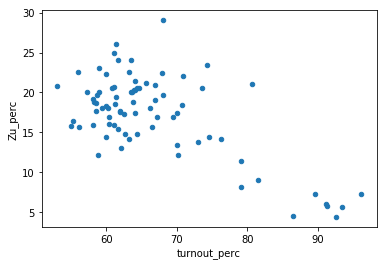

In [74]:
final.plot.scatter('turnout_perc', 'Zu_perc')

Можем привести график в порядок. Добавить заголовок и подписи к осям, плюс, изменить цвет точек. Для этого основной график сохраним в переменную `ax`, а затем применим к ней методы, которые отвечают за добавление заголовка и названиям осей *x* и *y*. 

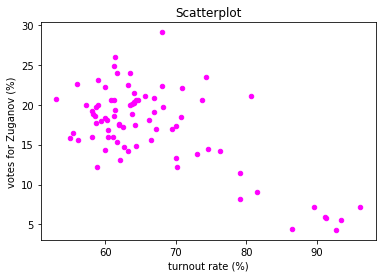

In [88]:
ax = final.plot.scatter('turnout_perc', 'Zu_perc', color = "magenta") # цвет magenta
ax.set_title('Scatterplot') # заголовок для объекта ax
ax.set_xlabel('turnout rate (%)') # подпись для оси x
ax.set_ylabel('votes for Zuganov (%)') # подпись для оси y

По графику видно, что, в целом, чем выше явка, тем ниже процент голосов за Зюганова. Углубляться в разные настройки графиков и в статистику не будем, но познакомимся с примером графика средствами библиотеки pandas. Построим матрицу диаграмм рассеяния (*scatterplot matrix*), сетку с диаграммами рассеяния для всех пар показателей.

Логично будет строить такой график для переменных в базе `perc`, поскольку правильнее смотреть на связи между показателями в процентах.

In [81]:
from pandas.plotting import scatter_matrix # импортируем функцию

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f53401685c0>,
      dtype=object)

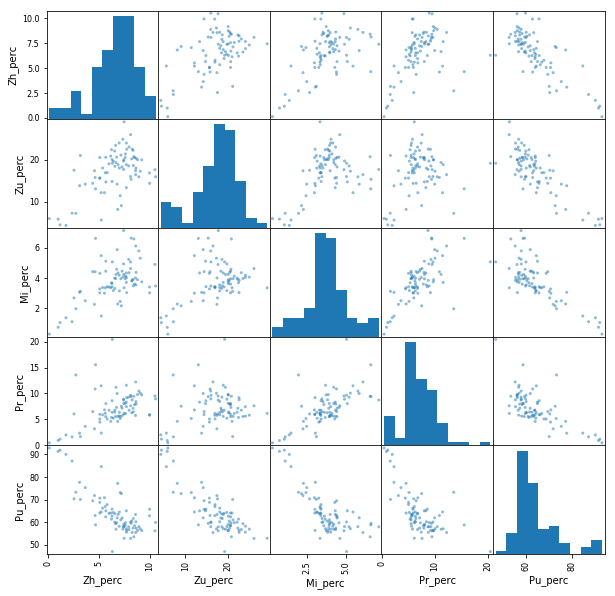

In [85]:
scatter_matrix(perc, diagonal='hist', figsize=(10, 10)) # строим график

Аргумент `diagonal` отвечает за тип графика, который будет находиться на диагонали (в нашем случае гистограмма ‒ `'hist'`), а аргумент `figsize` ‒ за размер графика (по горизонтали и по вертикали). На диагоналях также можно построить сглаженные графики плотности распределения показателей:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f533f744898>,
      dtype=object)

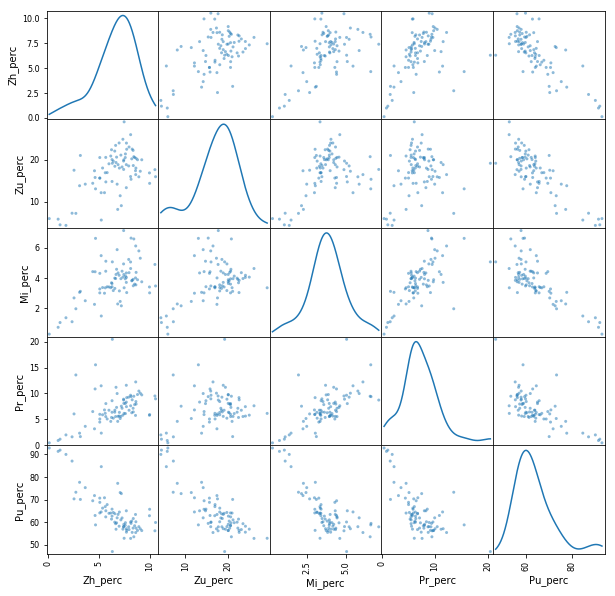

In [89]:
scatter_matrix(perc, diagonal='kde', figsize=(10, 10)) # kde - от kernel density estimation

На этом пока всё.